In [56]:
import numpy as np
import pandas as pd
import scanpy as sc

In [57]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


In [58]:
results_file = 'write/late-secretory-garcia-alonso-results.h5ad'

In [59]:
adata = sc.read_h5ad(
    'cache/endometrium_all.h5ad')

In [60]:
adata

AnnData object with n_obs × n_vars = 100307 × 28614
    obs: 'SampleID', 'log2p1_count', 'percent_mito', 'n_genes', 'DonorID', 'BiopsyType', 'Location', 'Binary Stage', 'Stage', 'Broad cell type', 'Cell type', 'CellCycle Phase'
    var: 'gene_ids', 'n_cells'
    uns: 'Binary Stage_colors', 'BinaryStage_colors', 'BiopsyType_colors', 'Broad cell type_colors', 'Cell type_colors', 'CellCycle Phase_colors', 'Day_colors', 'DonorID_colors', 'Location_colors', 'SampleID_colors', 'cosine_logXformedproj_bulkorg_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_res2_colors', 'cosine_logXformedproj_bulkorg_hormones_colors', 'cosine_logXformedproj_bulkorg_noinhib_colors', 'cosine_logXformedproj_bulkorg_strhormnoinhib_colors', 'cosine_proj_bulkorg_colors', 'cosine_proj_bulkorg_hormnoinhib_colors', 'cosine_proj_bulkorg_hormnoinhib_res2_colors', 'cosine_proj_bulkorg_hormones_colors', 'cosine_proj_bulkorg_noinhib_colors', 'cosine_proj_bulkorg_strhor

In [61]:
adata.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,13.951467,0.057320,3842,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,S
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,13.776227,0.043838,3544,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,12.894628,0.070791,2507,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Supporting,PV STEAP4,G1
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,12.329235,0.071137,1928,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,dS,G1
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,12.171176,0.063977,1824,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4577315_TTTGGTTAGGATAATC,GSM4577315,15.003430,0.041133,6244,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M
GSM4577315_TTTGGTTCACTACACA,GSM4577315,14.409987,0.025634,5045,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1
GSM4577315_TTTGGTTGTCCGACGT,GSM4577315,13.338180,0.079575,2911,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G1
GSM4577315_TTTGTTGGTTCGGCCA,GSM4577315,13.996120,0.059918,4592,SAMN15049042,Superficial_Biopsy,endometrium_biopsy,Proliferative,proliferative,Epithelial,SOX9,G2M


In [62]:
adata.lss = adata[adata.obs["SampleID"] == "MRC_Endo8625698",:] #lss=late secretory tissue sample

In [63]:
adata.lss.var_names_make_unique()

In [64]:
adata.lss

AnnData object with n_obs × n_vars = 4310 × 28614
    obs: 'SampleID', 'log2p1_count', 'percent_mito', 'n_genes', 'DonorID', 'BiopsyType', 'Location', 'Binary Stage', 'Stage', 'Broad cell type', 'Cell type', 'CellCycle Phase'
    var: 'gene_ids', 'n_cells'
    uns: 'Binary Stage_colors', 'BinaryStage_colors', 'BiopsyType_colors', 'Broad cell type_colors', 'Cell type_colors', 'CellCycle Phase_colors', 'Day_colors', 'DonorID_colors', 'Location_colors', 'SampleID_colors', 'cosine_logXformedproj_bulkorg_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_colors', 'cosine_logXformedproj_bulkorg_hormnoinhib_res2_colors', 'cosine_logXformedproj_bulkorg_hormones_colors', 'cosine_logXformedproj_bulkorg_noinhib_colors', 'cosine_logXformedproj_bulkorg_strhormnoinhib_colors', 'cosine_proj_bulkorg_colors', 'cosine_proj_bulkorg_hormnoinhib_colors', 'cosine_proj_bulkorg_hormnoinhib_res2_colors', 'cosine_proj_bulkorg_hormones_colors', 'cosine_proj_bulkorg_noinhib_colors', 'cosine_proj_bulkorg_strhormn

## Preprocessing

normalizing counts per cell
    finished (0:00:00)


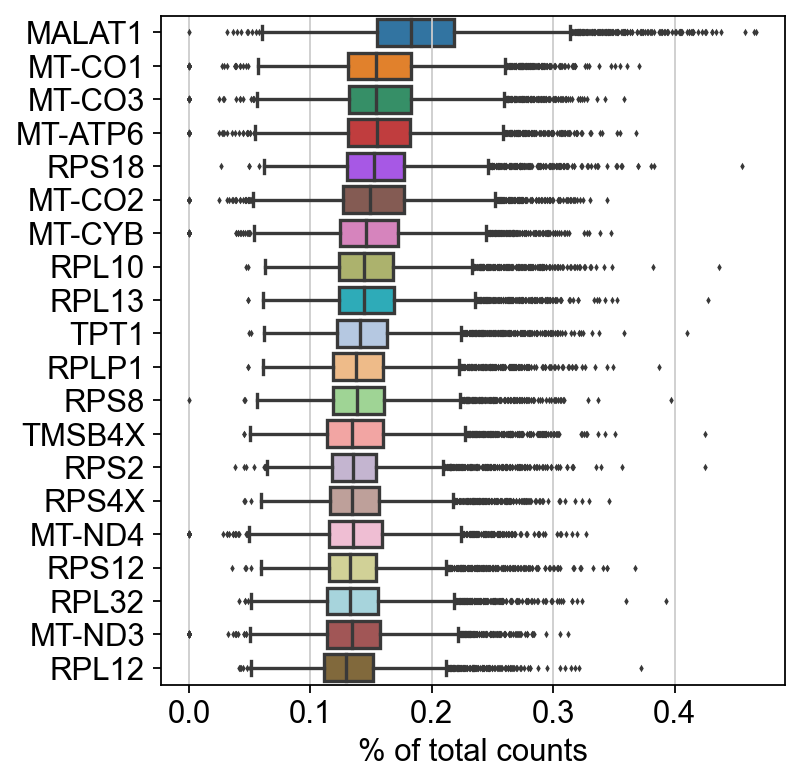

In [65]:
sc.pl.highest_expr_genes(adata.lss, n_top=20, )

In [66]:
sc.pp.filter_cells(adata.lss, min_genes=200)
sc.pp.filter_genes(adata.lss, min_cells=3)

filtered out 8736 genes that are detected in less than 3 cells


In [67]:
adata.lss.var['mt'] = adata.lss.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

In [68]:
sc.pp.calculate_qc_metrics(adata.lss, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

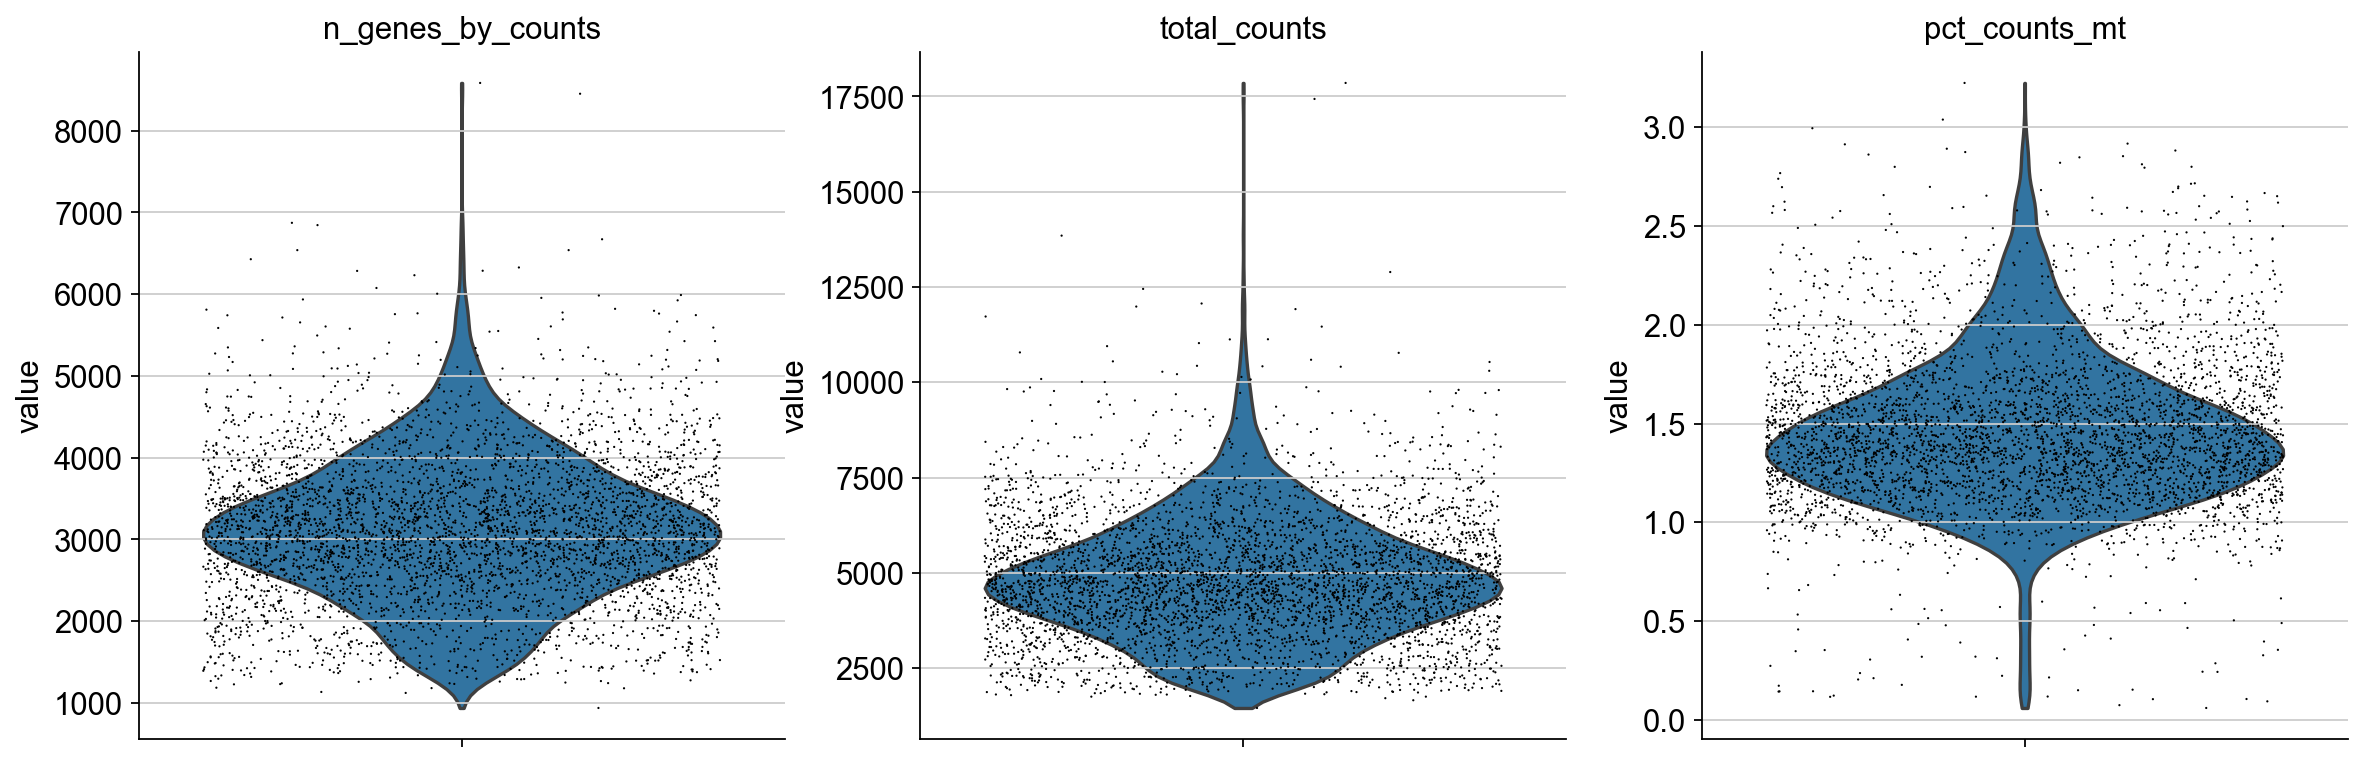

In [69]:
sc.pl.violin(adata.lss, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

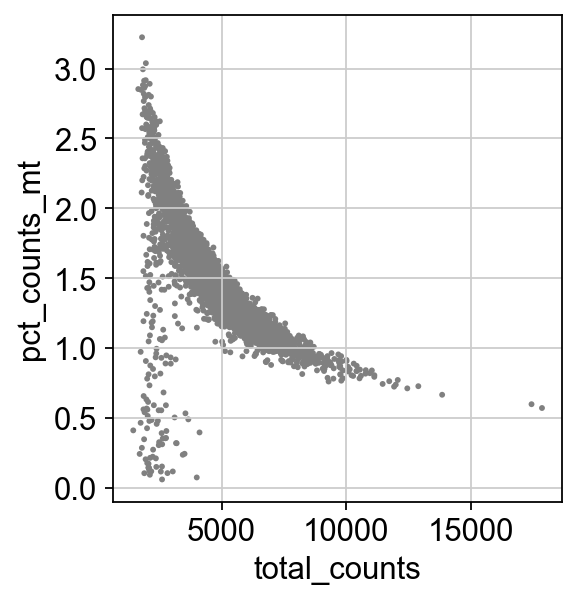

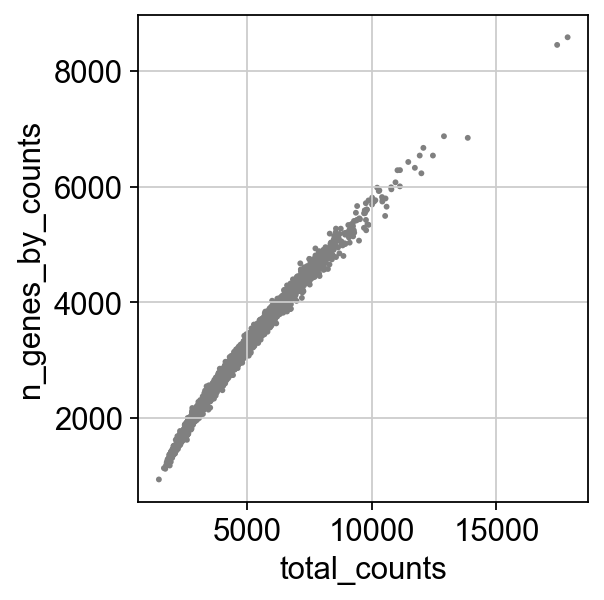

In [70]:
sc.pl.scatter(adata.lss, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata.lss, x='total_counts', y='n_genes_by_counts')

In [71]:
adata.lss = adata.lss[adata.lss.obs.n_genes_by_counts < 8000, :]
adata.lss = adata.lss[adata.lss.obs.pct_counts_mt < 3, :]

In [72]:
sc.pp.normalize_total(adata.lss, target_sum=1e4)

/Users/franziskakoch/PycharmProjects/Organoids_sc_WS2122/venv/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [73]:
sc.pp.log1p(adata.lss)

In [74]:
sc.pp.highly_variable_genes(adata.lss, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


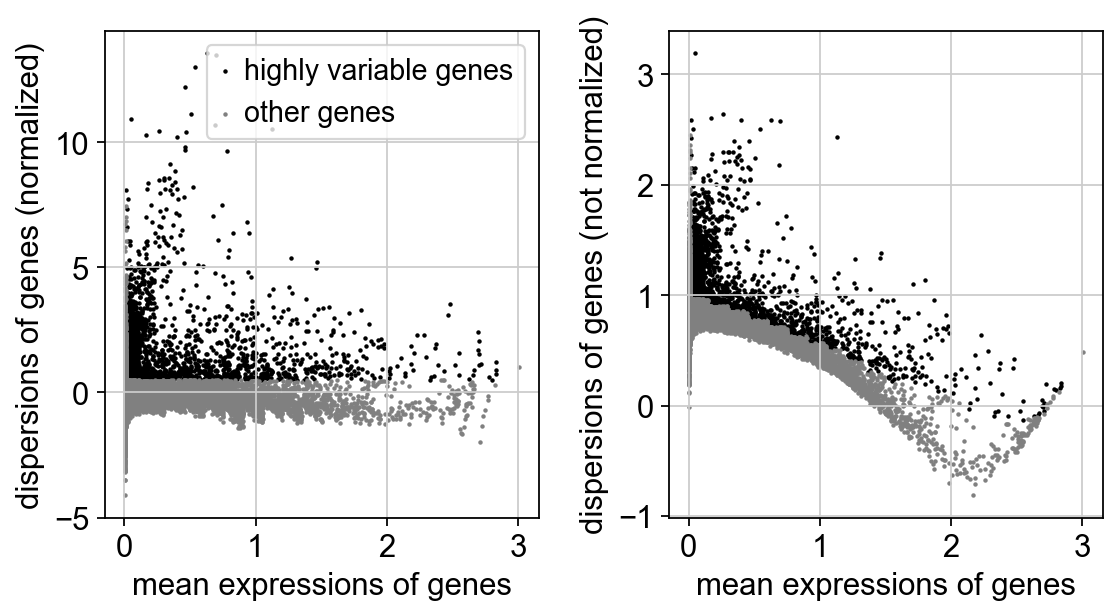

In [75]:
sc.pl.highly_variable_genes(adata.lss)

In [76]:
adata.raw = adata.lss

In [77]:
adata.lss = adata.lss[:, adata.lss.var.highly_variable]

In [78]:
sc.pp.regress_out(adata.lss, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:17)


In [79]:
sc.pp.scale(adata.lss, max_value=10)

## PCA

In [80]:
sc.tl.pca(adata.lss, n_comps=80, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=80
    finished (0:00:02)


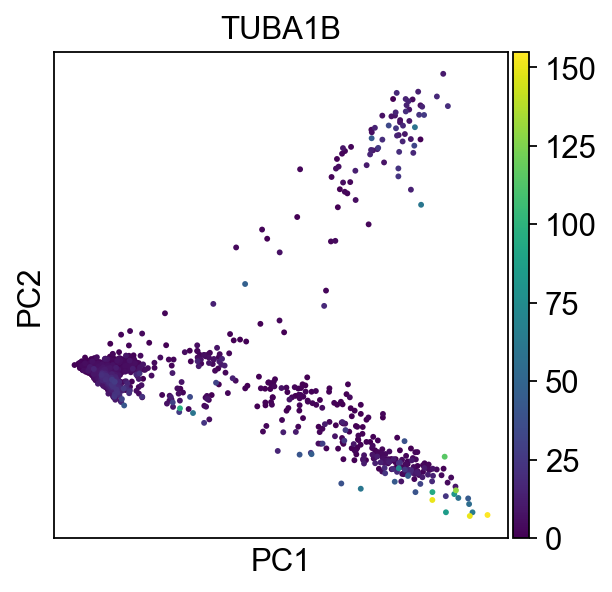

In [81]:
sc.pl.pca(adata.lss, color='TUBA1B')

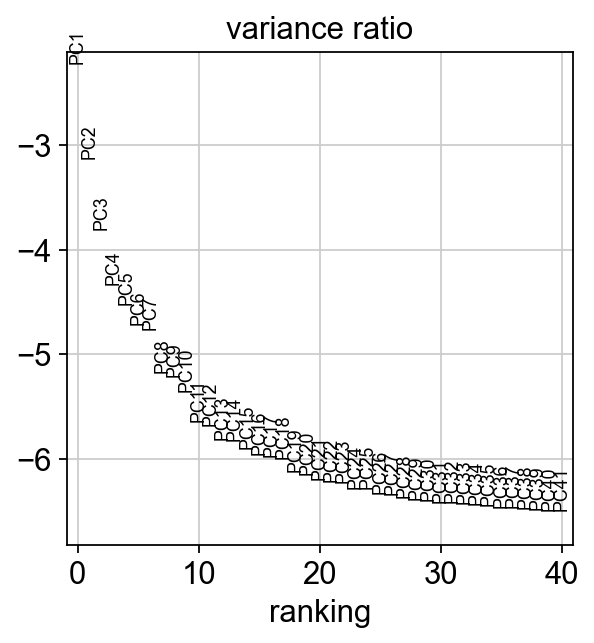

In [82]:
sc.pl.pca_variance_ratio(adata.lss, n_pcs=40, log=True)

## Computing the neighborhood graph

In [83]:
sc.pp.neighbors(adata.lss, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


## Embedding the neighborhood graph

In [84]:
sc.tl.leiden(adata.lss)
sc.tl.paga(adata.lss)
sc.pl.paga(adata.lss, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata.lss, init_pos='paga')

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


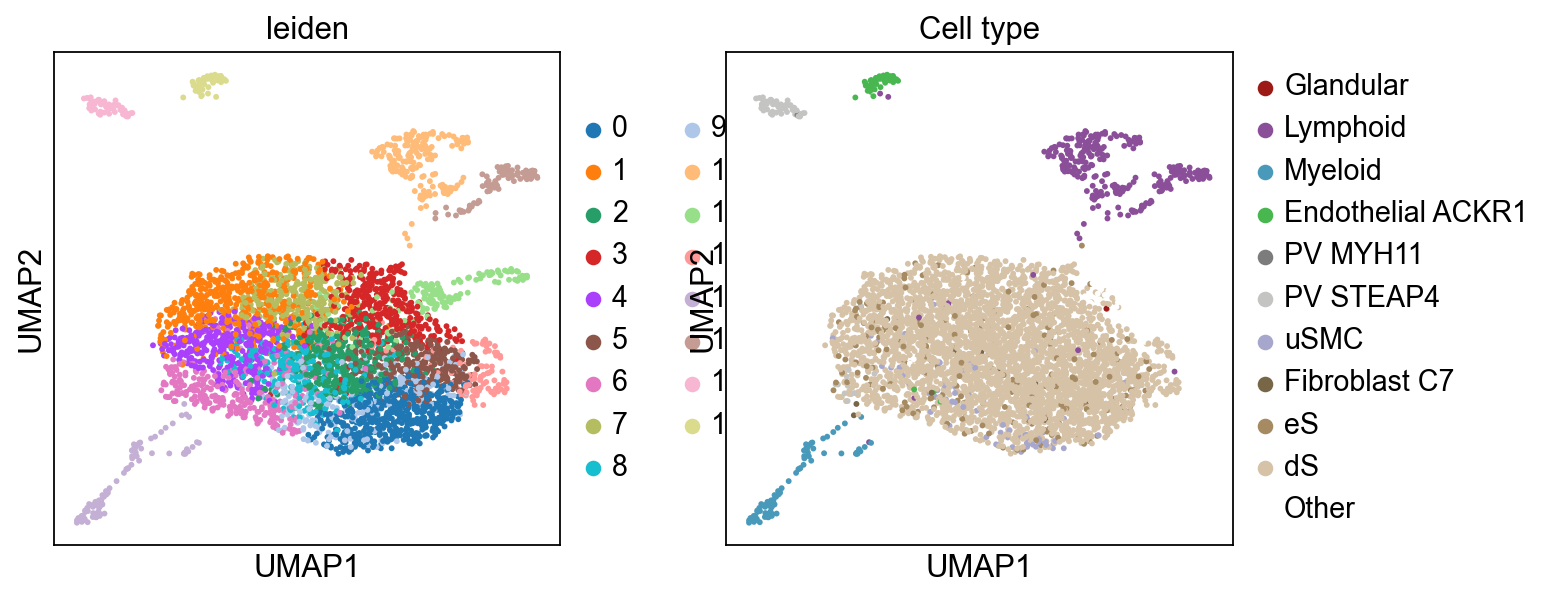

In [96]:
sc.pl.umap(adata.lss, color=['leiden', 'Cell type'])

## Finding marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


/Users/franziskakoch/PycharmProjects/Organoids_sc_WS2122/venv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


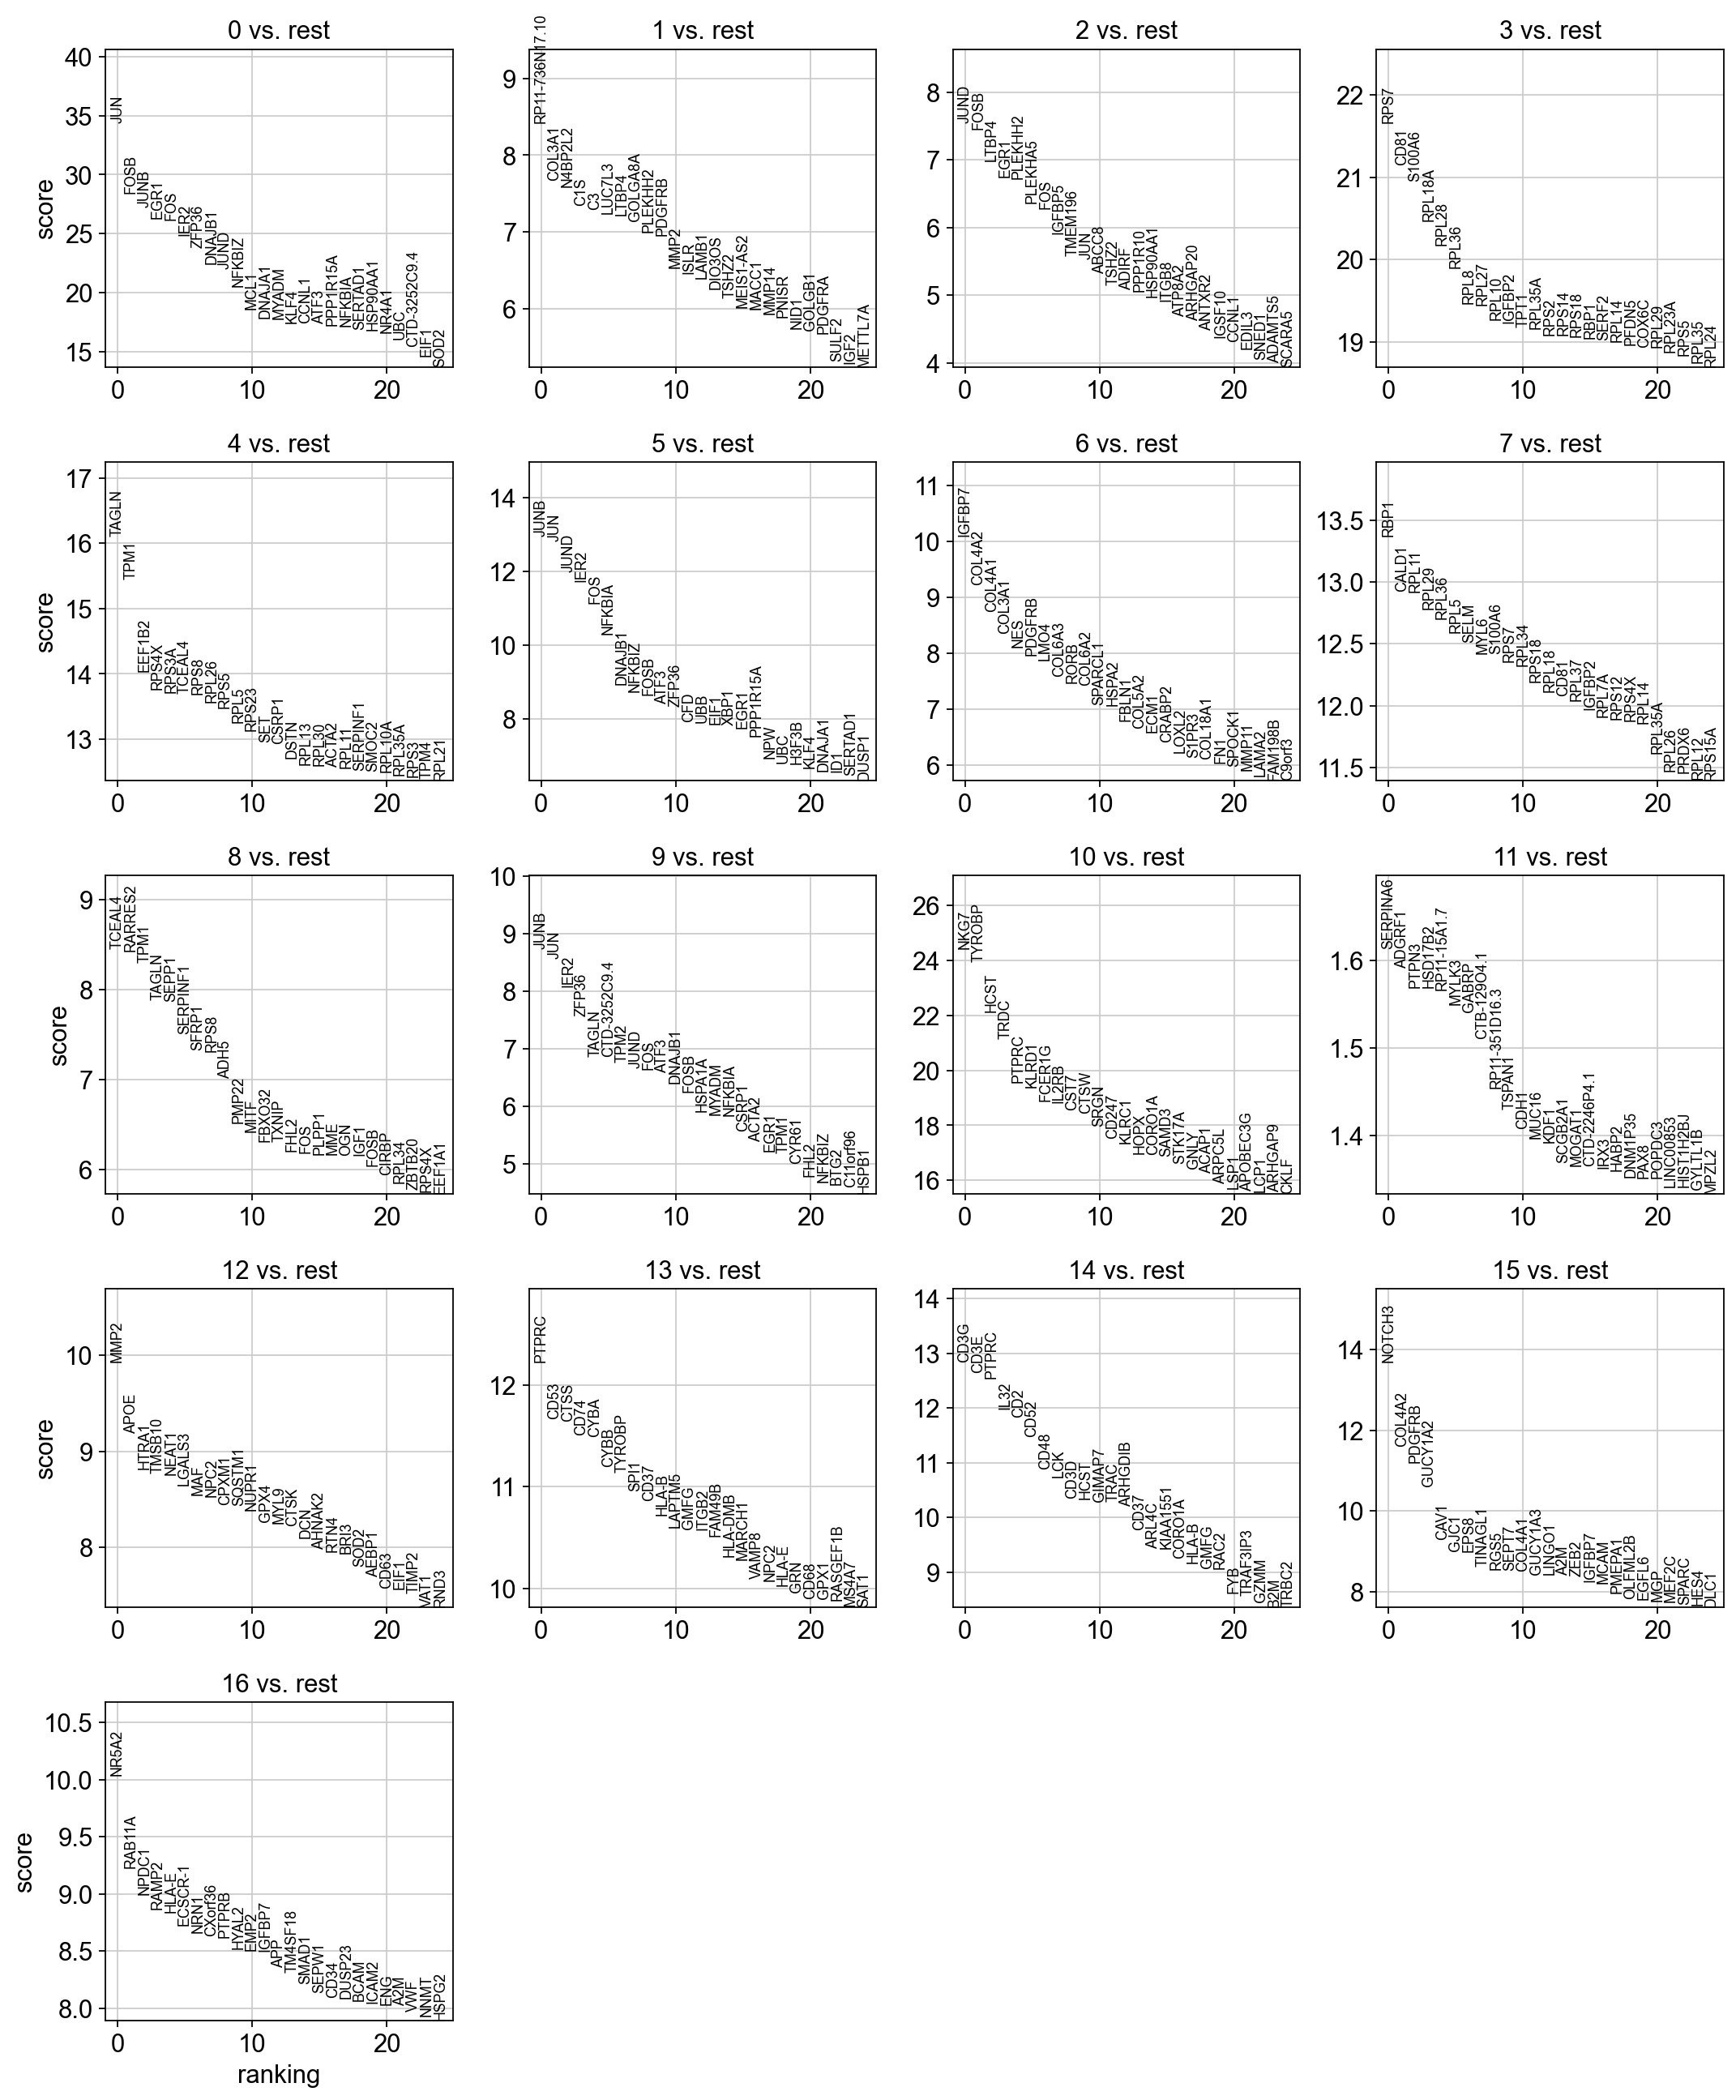

In [86]:
sc.tl.rank_genes_groups(adata.lss, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata.lss, n_genes=25, sharey=False)

In [87]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:15)


/Users/franziskakoch/PycharmProjects/Organoids_sc_WS2122/venv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


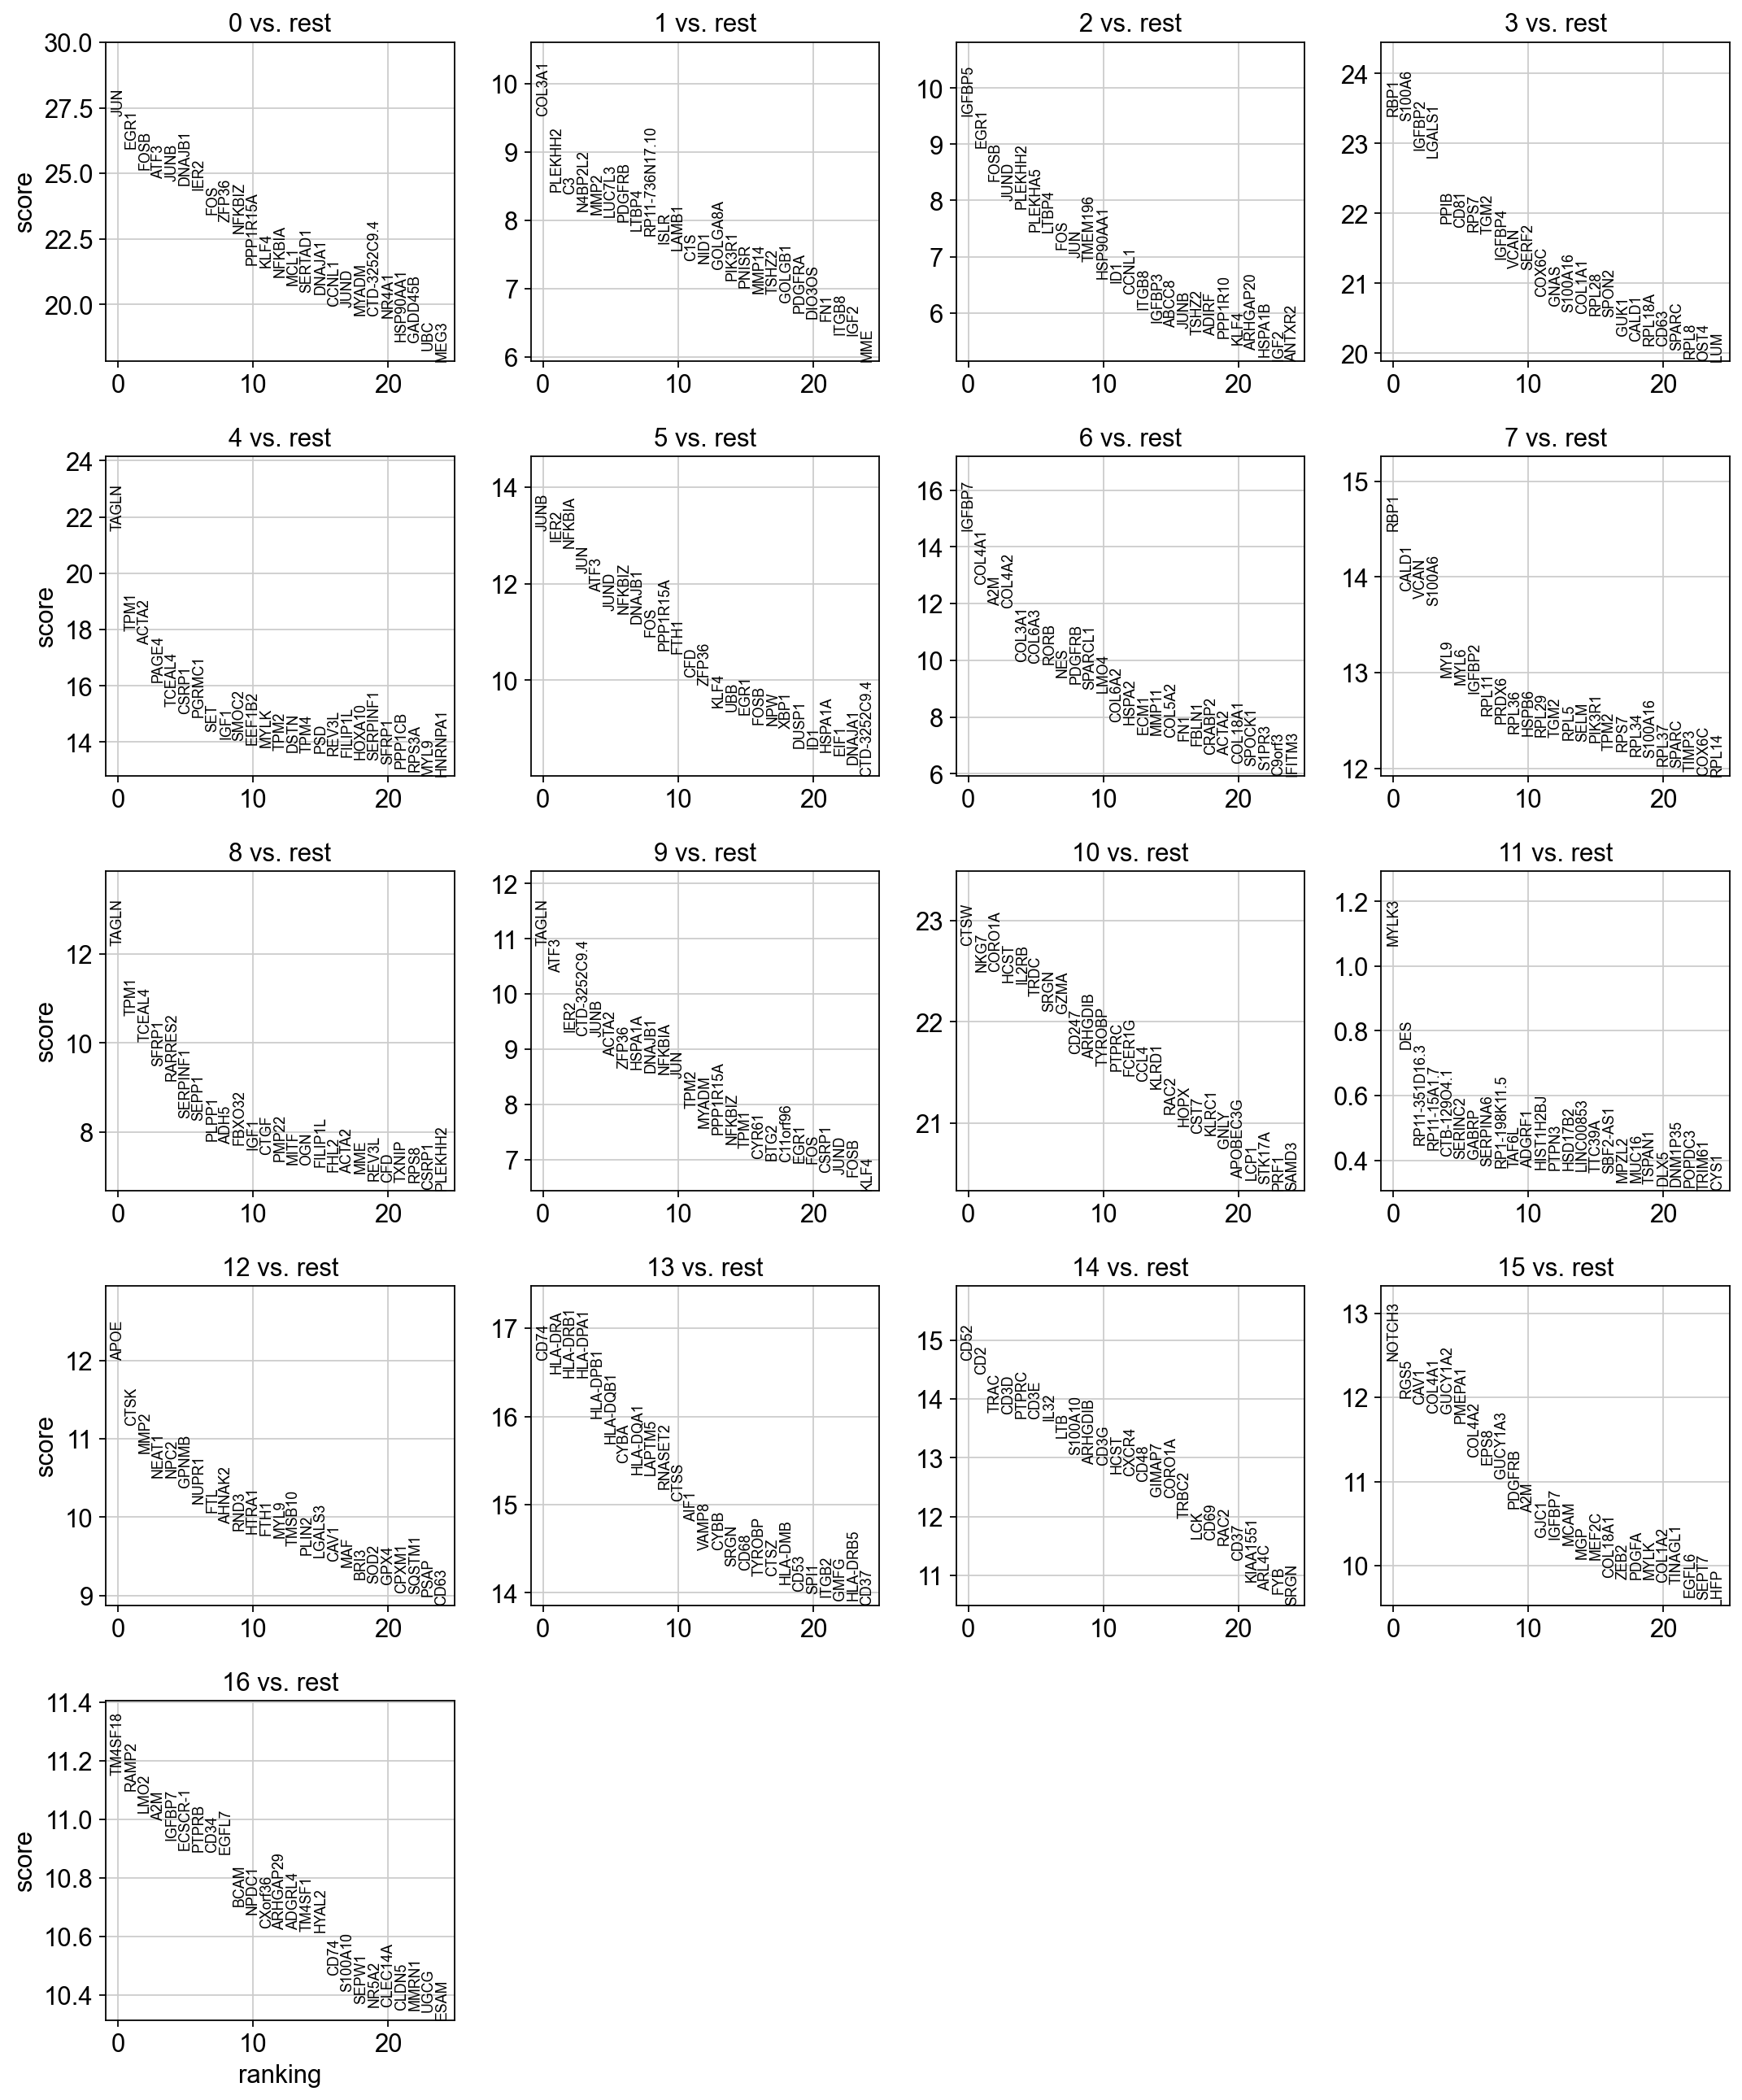

In [89]:
sc.tl.rank_genes_groups(adata.lss, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata.lss, n_genes=25, sharey=False)

An dieser Stelle müsste man eine Liste von marker genes definieren, verstehe noch nicht ganz wie das geht.

In [90]:
pd.DataFrame(adata.lss.uns['rank_genes_groups']['names']).head(10) #Show the 10 top ranked genes per cluster 0, 1, …, 16 in a dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,JUN,COL3A1,IGFBP5,RBP1,TAGLN,JUNB,IGFBP7,RBP1,TAGLN,TAGLN,CTSW,MYLK3,APOE,CD74,CD52,NOTCH3,TM4SF18
1,EGR1,PLEKHH2,EGR1,S100A6,TPM1,IER2,COL4A1,CALD1,TPM1,ATF3,NKG7,DES,CTSK,HLA-DRA,CD2,RGS5,RAMP2
2,FOSB,C3,FOSB,IGFBP2,ACTA2,NFKBIA,A2M,VCAN,TCEAL4,IER2,CORO1A,RP11-351D16.3,MMP2,HLA-DRB1,TRAC,CAV1,LMO2
3,ATF3,N4BP2L2,JUND,LGALS1,PAGE4,JUN,COL4A2,S100A6,SFRP1,CTD-3252C9.4,HCST,RP11-15A1.7,NEAT1,HLA-DPA1,CD3D,COL4A1,A2M
4,JUNB,MMP2,PLEKHH2,PPIB,TCEAL4,ATF3,COL3A1,MYL9,RARRES2,JUNB,IL2RB,CTB-129O4.1,NPC2,HLA-DPB1,PTPRC,GUCY1A2,IGFBP7
5,DNAJB1,LUC7L3,PLEKHA5,CD81,CSRP1,JUND,COL6A3,MYL6,SERPINF1,ACTA2,TRDC,SERINC2,GPNMB,HLA-DQB1,CD3E,PMEPA1,ECSCR-1
6,IER2,PDGFRB,LTBP4,RPS7,PGRMC1,NFKBIZ,RORB,IGFBP2,SEPP1,ZFP36,SRGN,GABRP,NUPR1,CYBA,IL32,COL4A2,PTPRB
7,FOS,LTBP4,FOS,TGM2,SET,DNAJB1,NES,RPL11,PLPP1,HSPA1A,GZMA,SERPINA6,FTL,HLA-DQA1,LTB,EPS8,CD34
8,ZFP36,RP11-736N17.10,JUN,IGFBP4,IGF1,FOS,PDGFRB,PRDX6,ADH5,DNAJB1,CD247,RP1-198K11.5,AHNAK2,LAPTM5,S100A10,GUCY1A3,EGFL7
9,NFKBIZ,ISLR,TMEM196,VCAN,SMOC2,PPP1R15A,SPARCL1,RPL36,FBXO32,NFKBIA,ARHGDIB,TAF6L,RND3,RNASET2,ARHGDIB,PDGFRB,BCAM


In [91]:
result = adata.lss.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,12_n,12_p,13_n,13_p,14_n,14_p,15_n,15_p,16_n,16_p
0,JUN,5.790658e-163,COL3A1,1.583857e-21,IGFBP5,1.885866e-21,RBP1,4.385239e-121,TAGLN,8.858052e-103,...,APOE,3.208680e-33,CD74,3.432816e-62,CD52,1.104619e-48,NOTCH3,1.433798e-35,TM4SF18,6.907139e-29
1,EGR1,1.059216e-148,PLEKHH2,3.800978e-17,EGR1,3.530757e-19,S100A6,2.216749e-120,TPM1,3.269887e-72,...,CTSK,5.200678e-29,HLA-DRA,4.438598e-61,CD2,3.522155e-47,RGS5,3.733205e-33,RAMP2,1.272819e-28
2,FOSB,1.178729e-139,C3,5.178193e-17,FOSB,6.792817e-17,IGFBP2,3.892302e-116,ACTA2,2.438606e-68,...,MMP2,2.580942e-27,HLA-DRB1,9.168267e-61,TRAC,3.697646e-43,CAV1,9.283266e-33,LMO2,2.923916e-28
3,ATF3,8.046385e-136,N4BP2L2,4.126331e-16,JUND,1.159462e-15,LGALS1,4.365907e-115,PAGE4,1.536823e-58,...,NEAT1,7.454953e-26,HLA-DPA1,9.575019e-61,CD3D,5.437114e-43,COL4A1,3.226166e-32,A2M,3.981489e-28
4,JUNB,9.873262e-135,MMP2,6.299465e-16,PLEKHH2,4.066602e-15,PPIB,6.654949e-106,TCEAL4,1.255629e-52,...,NPC2,8.104476e-26,HLA-DPB1,1.613848e-57,PTPRC,1.488494e-42,GUCY1A2,3.230437e-32,IGFBP7,8.387694e-28
5,DNAJB1,3.207820e-133,LUC7L3,7.852344e-16,PLEKHA5,9.093127e-14,CD81,2.367656e-105,CSRP1,5.433538e-51,...,GPNMB,2.922642e-25,HLA-DQB1,1.585982e-55,CD3E,1.767312e-42,PMEPA1,1.283687e-31,ECSCR-1,1.183724e-27
6,IER2,3.230625e-131,PDGFRB,1.440798e-15,LTBP4,9.738089e-14,RPS7,7.001833e-105,PGRMC1,3.063669e-50,...,NUPR1,2.465587e-24,CYBA,4.666492e-54,IL32,2.255430e-42,COL4A2,1.421299e-29,PTPRB,1.278995e-27
7,FOS,1.016839e-121,LTBP4,4.333341e-15,FOS,9.299845e-13,TGM2,1.803793e-104,SET,6.681456e-47,...,FTL,7.981603e-24,HLA-DQA1,3.688681e-53,LTB,1.281213e-40,EPS8,3.760937e-29,CD34,1.330810e-27
8,ZFP36,1.063885e-118,RP11-736N17.10,7.486861e-15,JUN,2.843837e-12,IGFBP4,4.153932e-101,IGF1,2.640229e-45,...,AHNAK2,3.433098e-23,LAPTM5,4.351541e-53,S100A10,6.171211e-39,GUCY1A3,2.420252e-28,EGFL7,1.393261e-27
9,NFKBIZ,2.994491e-114,ISLR,1.835463e-14,TMEM196,4.491944e-12,VCAN,5.506448e-100,SMOC2,7.437043e-45,...,RND3,7.609467e-23,RNASET2,4.897060e-52,ARHGDIB,5.172621e-38,PDGFRB,1.194242e-26,BCAM,9.689618e-27


ranking genes
    finished (0:00:04)


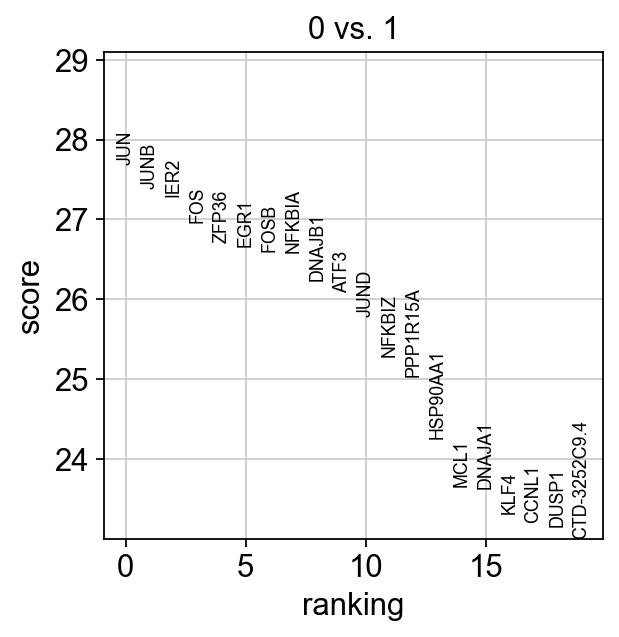

In [92]:
sc.tl.rank_genes_groups(adata.lss, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata.lss, groups=['0'], n_genes=20) #Comparing to a single cluster

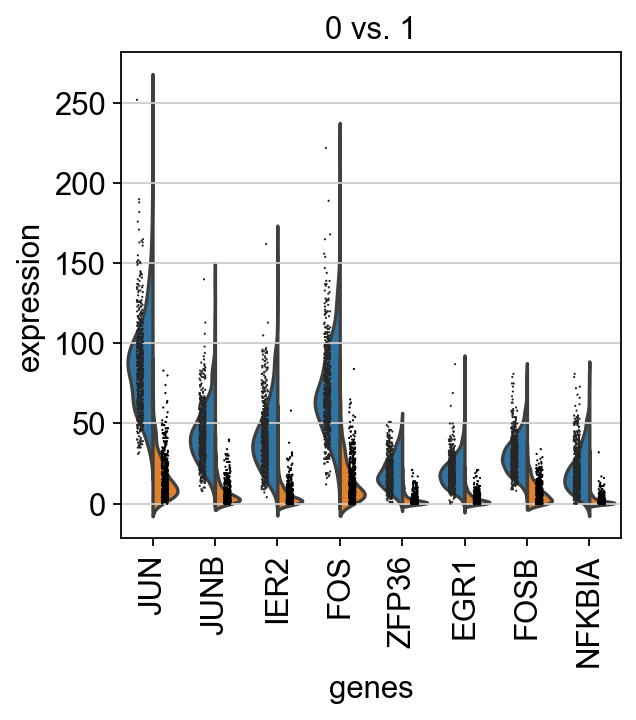

In [95]:
sc.pl.rank_genes_groups_violin(adata.lss, groups='0', n_genes=8)